学习{mlr3verse}预处理技术。

先导入数据集：

In [3]:
ames <- mlr3data::ames_housing

# 数据清洗

In [4]:
library(tidyverse)
library(mlr3verse)
library(modelsummary)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: mlr3


Attaching package: 'mlr3'


The following object is masked from 'package:skimr':

    partition




In [6]:
library(DataExplorer)

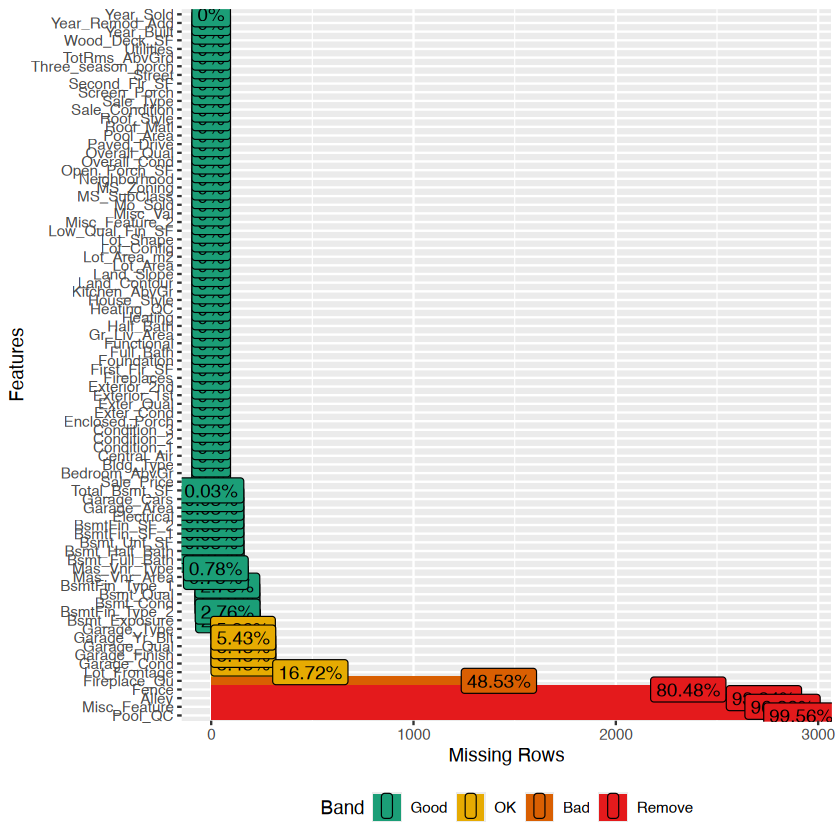

In [7]:
plot_missing(ames)

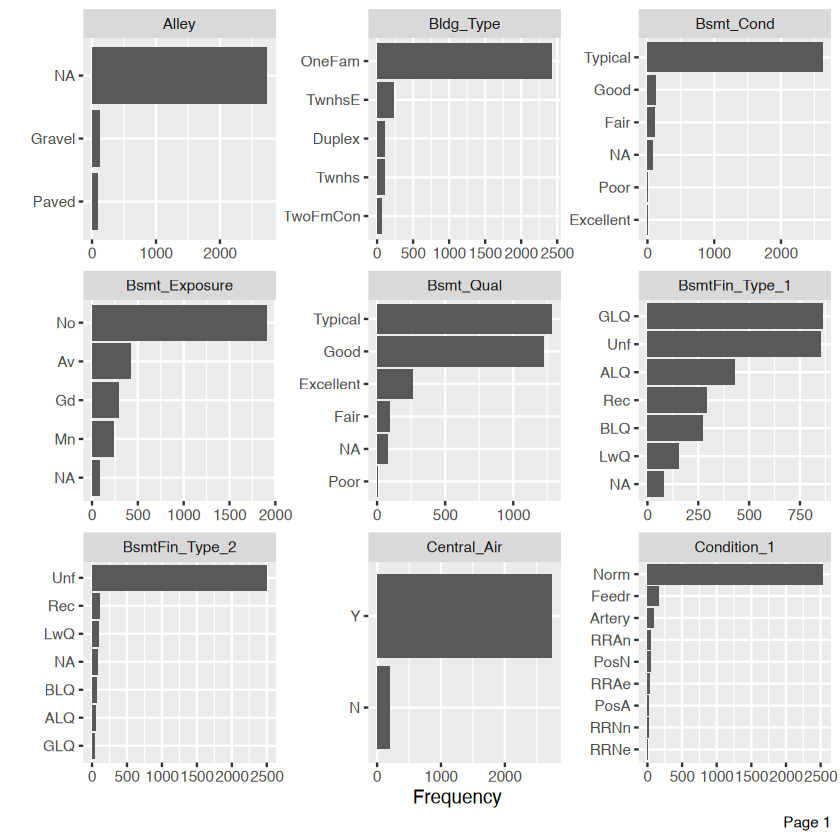

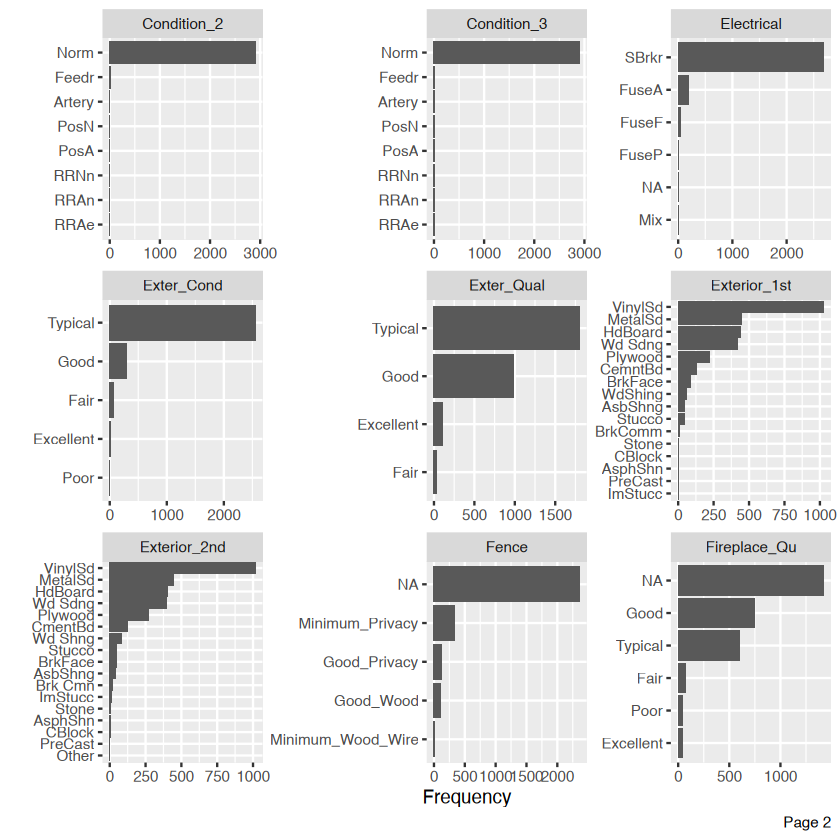

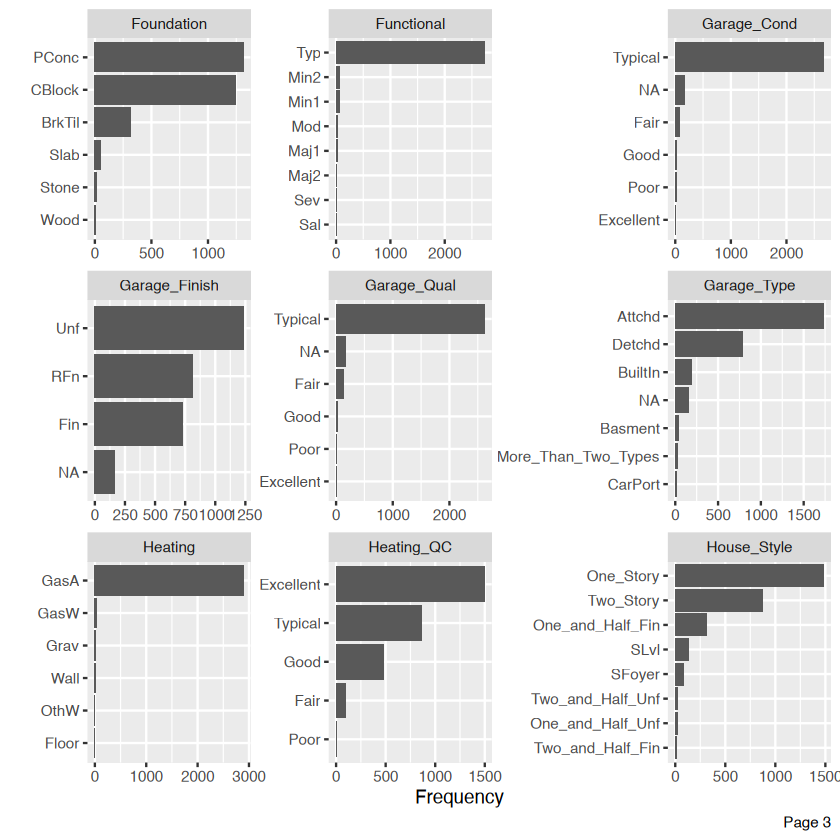

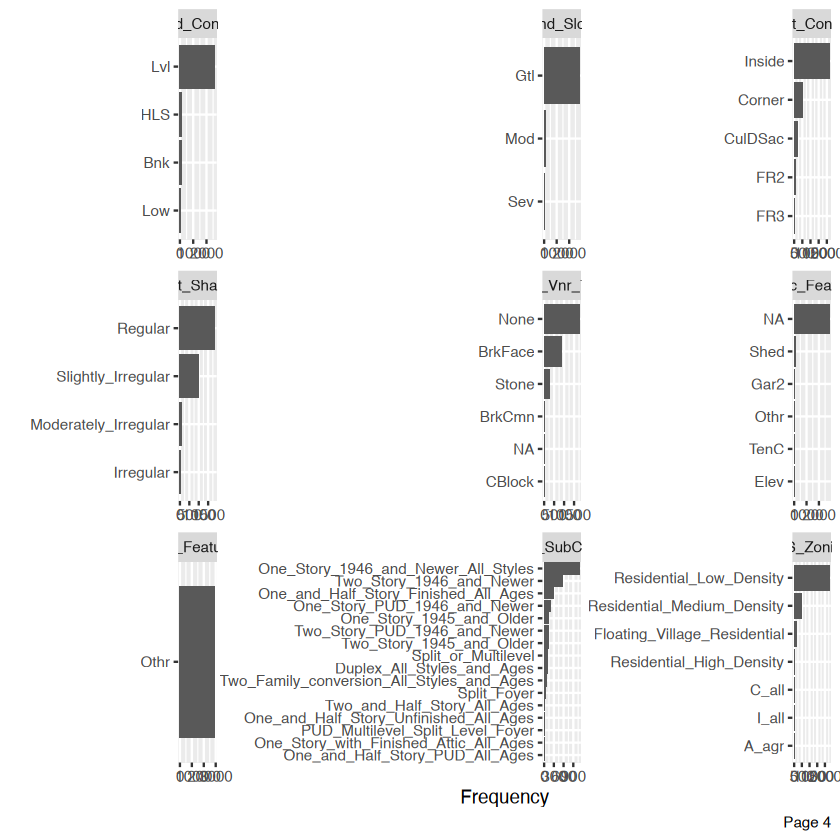

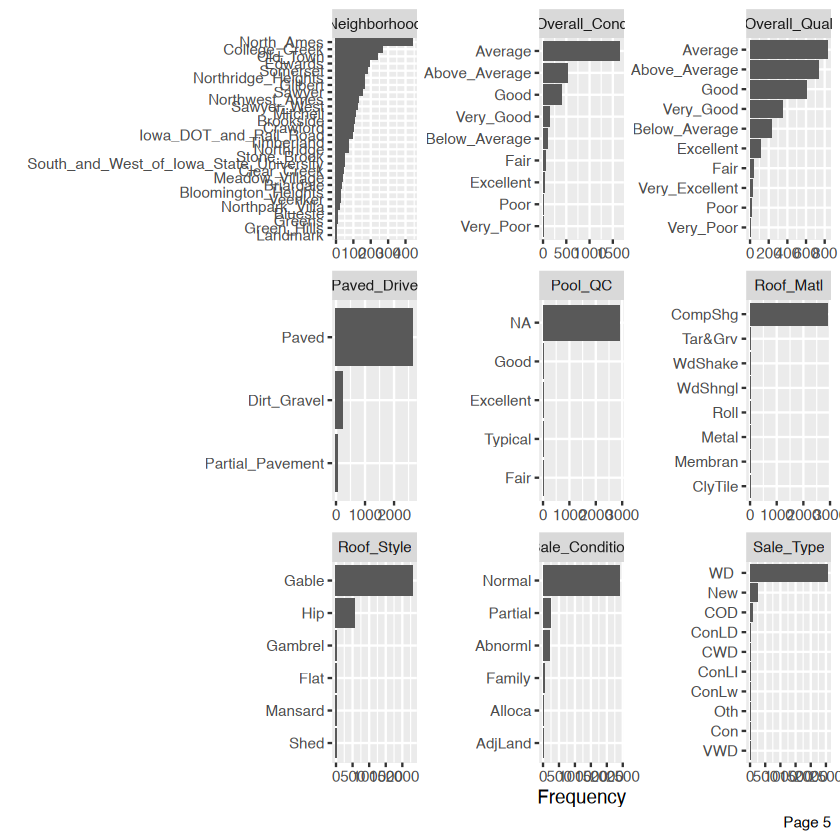

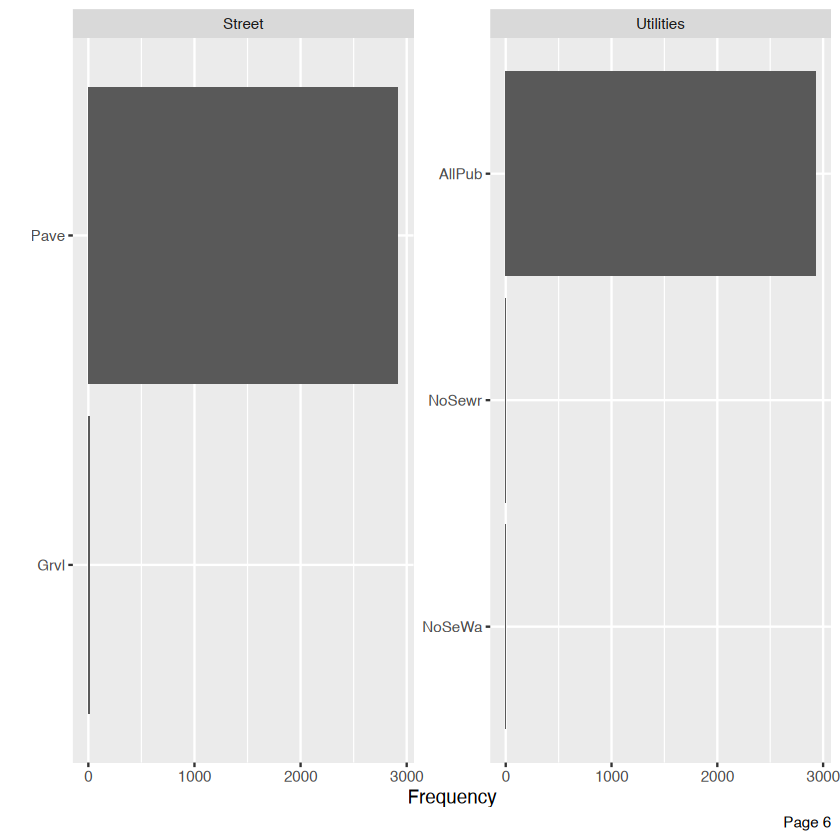

In [9]:
plot_bar(ames)

In [6]:
library(skimr)
skim(ames) %>% print()

-- Data Summary ------------------------
                           Values
Name                       ames  
Number of rows             2930  
Number of columns          82    
Key                        NULL  
_______________________          
Column type frequency:           
  factor                   47    
  numeric                  35    
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
   skim_variable  n_missing complete_rate ordered n_unique
 1 Alley               2732       0.0676  FALSE          2
 2 Bldg_Type              0       1       FALSE          5
 3 Bsmt_Cond             80       0.973   FALSE          5
 4 Bsmt_Exposure         83       0.972   FALSE          4
 5 Bsmt_Qual             80       0.973   FALSE          5
 6 BsmtFin_Type_1        80       0.973   FALSE          6
 7 BsmtFin_Type_2        81       0.972   FALSE          6
 8 Central_Air            0    

In [ ]:
# 1. `Misc_Feature_2` is a factor with only a single level `Othr`.
summary(ames$Misc_Feature_2)

# Othr 
# 2930

Othr 
2930

In [11]:
library(DataExplorer)

1 features with more than 20 categories ignored!
Neighborhood: 28 categories


Warning message in cor(x = structure(list(Sale_Price = c(215000L, 105000L, 172000L, :
"the standard deviation is zero"


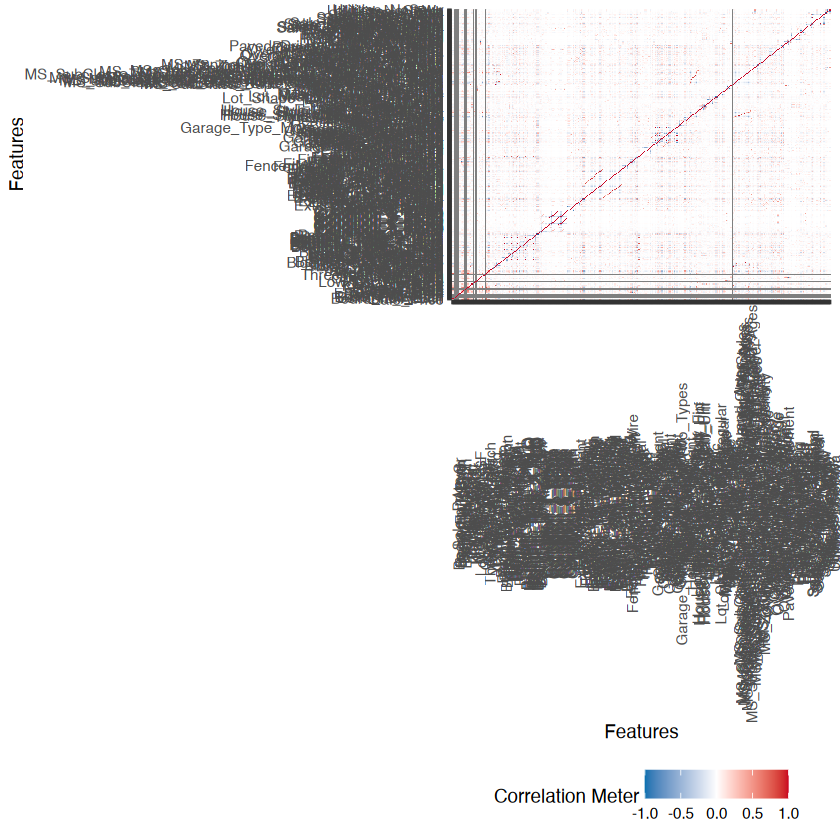

In [12]:
plot_correlation(ames)

In [21]:
ames %>%
  # 选择数值列
  select(where(is.numeric)) %>%
  cor()

,Sale_Price,Bedroom_AbvGr,Bsmt_Full_Bath,Bsmt_Half_Bath,Bsmt_Unf_SF,BsmtFin_SF_1,BsmtFin_SF_2,Enclosed_Porch,Fireplaces,First_Flr_SF,...,Pool_Area,Screen_Porch,Second_Flr_SF,Three_season_porch,Total_Bsmt_SF,TotRms_AbvGrd,Wood_Deck_SF,Year_Built,Year_Remod_Add,Year_Sold
Sale_Price,1.00000000,0.1439134284,NA,NA,NA,NA,NA,-0.1287874415,0.4745580926,0.62167606,...,0.068403247,0.112151214,0.269373357,0.0322246494,NA,0.49547442,0.3271431740,0.558426106,0.532973754,-0.0305690867
Bedroom_AbvGr,0.14391343,1.0000000000,NA,NA,NA,NA,NA,0.0521153628,0.0769708500,0.10664780,...,0.036706951,0.009250464,0.504650590,-0.0471509838,NA,0.67264716,0.0297108884,-0.055093229,-0.021536320,-0.0180075283
Bsmt_Full_Bath,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Bsmt_Half_Bath,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Bsmt_Unf_SF,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BsmtFin_SF_1,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BsmtFin_SF_2,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Enclosed_Porch,-0.12878744,0.0521153628,NA,NA,NA,NA,NA,1.0000000000,-0.0002495617,-0.06571349,...,0.092596279,-0.063965313,0.055429494,-0.0326741016,NA,0.01722131,-0.1191359888,-0.374364412,-0.220383265,-0.0005048655
Fireplaces,0.47455809,0.0769708500,NA,NA,NA,NA,NA,-0.0002495617,1.0000000000,0.40634480,...,0.098448593,0.168003935,0.165844491,0.0184142543,NA,0.30286528,0.2280642192,0.170672086,0.133322133,-0.0076118595
First_Flr_SF,0.62167606,0.1066478018,NA,NA,NA,NA,NA,-0.0657134883,0.4063447957,1.00000000,...,0.121820559,0.098316395,-0.250057201,0.0440614259,NA,0.39016201,0.2271309209,0.310462545,0.242107815,-0.0136670199


In [ ]:
# 2. `Condition_2` and `Condition_3` are identical.
identical(ames$Condition_2, ames$Condition_3)

# [1] TRUE

[1] TRUE

In [ ]:
# 3. `Lot_Area` and `Lot_Area_m2` are same data on different scales
cor(ames$Lot_Area, ames$Lot_Area_m2)

# [1] 1

[1] 1

In [ ]:
to_remove <- c("Lot_Area_m2", "Condition_3", "Misc_Feature_2")

In [23]:
tsk_ames <- as_task_regr(ames, target = "Sale_Price", id = "ames")
# 移除有问题的特征
tsk_ames$select(setdiff(tsk_ames$feature_names, to_remove))

msr_mae <- msr("regr.mae")
rsmp_cv3 <- rsmp("cv", folds = 3)
rsmp_cv3$instantiate(tsk_ames)

In [ ]:
# 创建基线模型
lrn_baseline <- lrn("regr.featureless", robust = TRUE)
lrn_baseline$id <- "Baseline"

# 交叉验证评估
rr_baseline <- resample(tsk_ames, lrn_baseline, rsmp_cv3)
rr_baseline$aggregate(msr_mae)

# regr.mae 
# 56099.71

INFO  [17:08:25.486] [mlr3] Applying learner 'Baseline' on task 'ames' (iter 1/3)
INFO  [17:08:25.544] [mlr3] Applying learner 'Baseline' on task 'ames' (iter 2/3)
INFO  [17:08:25.555] [mlr3] Applying learner 'Baseline' on task 'ames' (iter 3/3)


regr.mae 
56099.71

# 因子编码

In [26]:
ames %>% glimpse()

Rows: 2,930
Columns: 82
$ Sale_Price         <int> 215000, 105000, 172000, 244000, 189900, 195500, 213~
$ Alley              <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,~
$ Bedroom_AbvGr      <int> 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 1, 4, 4, ~
$ Bldg_Type          <fct> OneFam, OneFam, OneFam, OneFam, OneFam, OneFam, Twn~
$ Bsmt_Cond          <fct> Good, Typical, Typical, Typical, Typical, Typical, ~
$ Bsmt_Exposure      <fct> Gd, No, No, No, No, No, Mn, No, No, No, No, No, No,~
$ Bsmt_Full_Bath     <int> 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, ~
$ Bsmt_Half_Bath     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ Bsmt_Qual          <fct> Typical, Typical, Typical, Typical, Good, Typical, ~
$ Bsmt_Unf_SF        <int> 441, 270, 406, 1045, 137, 324, 722, 1017, 415, 994,~
$ BsmtFin_SF_1       <int> 639, 468, 923, 1065, 791, 602, 616, 263, 1180, 0, 0~
$ BsmtFin_SF_2       <int> 0, 144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1120, 0~
$ BsmtFin_Type_1

In [ ]:
lrn_xgb <- lrn("regr.xgboost", nrounds = 100)
lrn_xgb$train(tsk_ames)

# Error in assert_task_learner(task, learner, param_values): <TaskRegr:ames> has the following unsupported feature types: factor
# Traceback:

ERROR: Error in assert_task_learner(task, learner, param_values): <TaskRegr:ames> has the following unsupported feature types: factor


In [ ]:
names(which(lengths(tsk_ames$levels()) > 10))

# [1] "Exterior_1st" "Exterior_2nd" "MS_SubClass"  "Neighborhood"

[1] "Exterior_1st" "Exterior_2nd" "MS_SubClass"  "Neighborhood"

In [ ]:
names(which(lengths(tsk_ames$levels()) == 2))

# [1] "Alley"       "Central_Air" "Street"

[1] "Alley"       "Central_Air" "Street"

In [29]:
factor_pipeline <-
  po("removeconstants") %>>%
  po("collapsefactors", no_collapse_above_prevalence = 0.01) %>>%
  po("encodeimpact",
     affect_columns = selector_cardinality_greater_than(10),
     id = "high_card_enc") %>>%
  po("encode", method = "one-hot",
     affect_columns = selector_cardinality_greater_than(2),
     id = "low_card_enc") %>>%
  po("encode", method = "treatment",
     affect_columns = selector_type("factor"),
     id = "binary_enc")

In [94]:
glrn_xgb_impact <- as_learner(factor_pipeline %>>% lrn_xgb)
glrn_xgb_impact$id <- "XGB_enc_impact"

glrn_xgb_one_hot <- as_learner(po("encode") %>>% lrn_xgb)
glrn_xgb_one_hot$id <- "XGB_enc_onehot"

bmr <- benchmark(benchmark_grid(
  tsk_ames,
  c(lrn_baseline, glrn_xgb_impact, glrn_xgb_one_hot),
  rsmp_cv3
))
bmr$aggregate(measure = msr_mae)[, .(learner_id, regr.mae)]

# learner_id     regr.mae
# 1 Baseline       56099.71
# 2 XGB_enc_impact 16470.41
# 3 XGB_enc_onehot 16613.76

INFO  [19:48:34.283] [mlr3] Running benchmark with 9 resampling iterations
INFO  [19:48:34.291] [mlr3] Applying learner 'Baseline' on task 'ames' (iter 1/3)
INFO  [19:48:34.300] [mlr3] Applying learner 'Baseline' on task 'ames' (iter 2/3)
INFO  [19:48:34.306] [mlr3] Applying learner 'Baseline' on task 'ames' (iter 3/3)
INFO  [19:48:34.319] [mlr3] Applying learner 'XGB_enc_impact' on task 'ames' (iter 1/3)
INFO  [19:48:36.195] [mlr3] Applying learner 'XGB_enc_impact' on task 'ames' (iter 2/3)
INFO  [19:48:37.712] [mlr3] Applying learner 'XGB_enc_impact' on task 'ames' (iter 3/3)
INFO  [19:48:39.250] [mlr3] Applying learner 'XGB_enc_onehot' on task 'ames' (iter 1/3)
INFO  [19:48:41.450] [mlr3] Applying learner 'XGB_enc_onehot' on task 'ames' (iter 2/3)
INFO  [19:48:43.535] [mlr3] Applying learner 'XGB_enc_onehot' on task 'ames' (iter 3/3)
INFO  [19:48:46.151] [mlr3] Finished benchmark


learner_id,regr.mae
<chr>,<dbl>
Baseline,56099.71
XGB_enc_impact,16470.41
XGB_enc_onehot,16613.76


# 缺失值

In [ ]:
# print first five with missing data
names(which(tsk_ames$missings() > 0))[1:5]

# [1] "Alley"          "BsmtFin_SF_1"   "BsmtFin_SF_2"   "BsmtFin_Type_1"
# [5] "BsmtFin_Type_2"

[1] "Alley"          "BsmtFin_SF_1"   "BsmtFin_SF_2"   "BsmtFin_Type_1"
[5] "BsmtFin_Type_2"

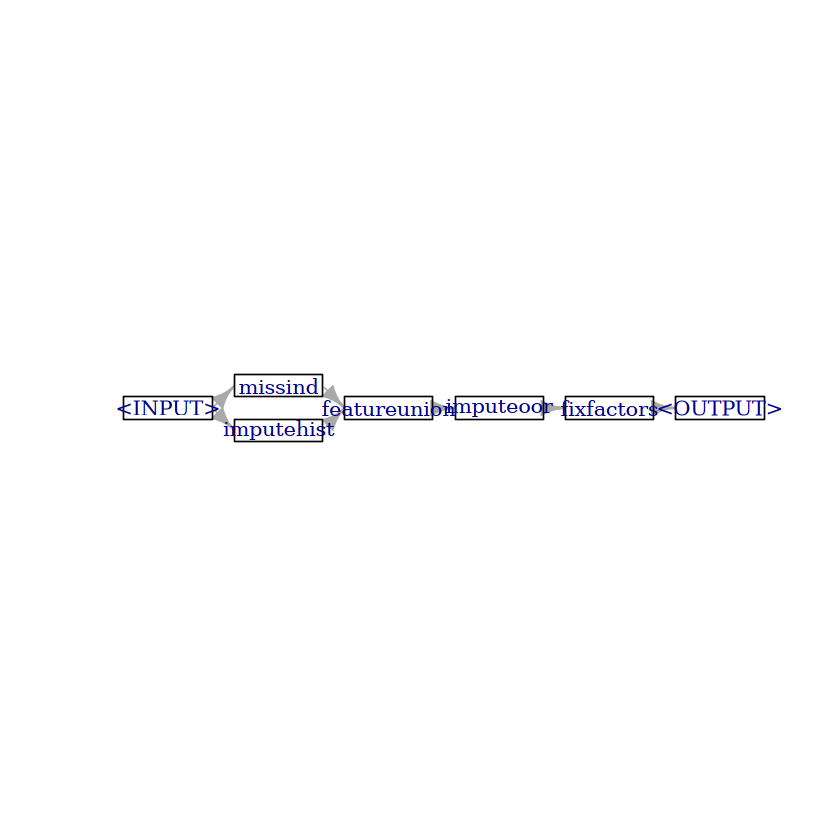

In [84]:
impute_hist <- list(
  po(
    "missind",
    type = "integer",
    affect_columns = selector_type("integer")
  ),
  po(
    "imputehist",
    affect_columns = selector_type("integer")
  )
) %>>%
  po("featureunion") %>>%
  po(
    "imputeoor",
    affect_columns = selector_type("factor")
  ) %>>%
  po("fixfactors")

impute_hist$plot(horizontal = TRUE)

In [95]:
glrn_rf_impute_hist <- as_learner(
  impute_hist %>>% lrn("regr.ranger")
)
glrn_rf_impute_hist$id <- "RF_impute_hist"

glrn_rf_impute_oor <- as_learner(
  po("imputeoor") %>>%
    po("fixfactors") %>>%
    lrn("regr.ranger")
)
glrn_rf_impute_oor$id <- "RF_impute_oor"

design <- benchmark_grid(
  tsk_ames,
  c(glrn_rf_impute_hist, glrn_rf_impute_oor),
  rsmp_cv3
)

bmr_new <- benchmark(design)

INFO  [19:48:52.407] [mlr3] Running benchmark with 6 resampling iterations
INFO  [19:48:52.413] [mlr3] Applying learner 'RF_impute_hist' on task 'ames' (iter 1/3)
INFO  [19:48:54.278] [mlr3] Applying learner 'RF_impute_hist' on task 'ames' (iter 2/3)
INFO  [19:48:55.919] [mlr3] Applying learner 'RF_impute_hist' on task 'ames' (iter 3/3)
INFO  [19:48:57.495] [mlr3] Applying learner 'RF_impute_oor' on task 'ames' (iter 1/3)
INFO  [19:48:58.638] [mlr3] Applying learner 'RF_impute_oor' on task 'ames' (iter 2/3)
INFO  [19:48:59.920] [mlr3] Applying learner 'RF_impute_oor' on task 'ames' (iter 3/3)
INFO  [19:49:01.092] [mlr3] Finished benchmark


In [96]:
bmr$combine(bmr_new)
bmr$aggregate(measure = msr_mae)[, .(learner_id, regr.mae)]

# learner_id     regr.mae
# 1 Baseline       56099.71
# 2 XGB_enc_impact 16470.41
# 3 XGB_enc_onehot 16613.76
# 4 RF_impute_hist 16234.68
# 5 RF_impute_oor  16202.29

learner_id,regr.mae
<chr>,<dbl>
Baseline,56099.71
XGB_enc_impact,16470.41
XGB_enc_onehot,16613.76
RF_impute_hist,16253.48
RF_impute_oor,16264.38


# 管道稳健化

试试看一键稳健化处理：

In [98]:
glrn_robust <- as_learner(
  ppl("robustify") %>>%
    lrn("regr.ranger")
)
glrn_robust$id <- "RF_robust"

rr <- resample(
  tsk_ames,
  glrn_robust,
  rsmp_cv3
)
rr$aggregate(msr_mae)

# regr.mae 
# 16741.56 

INFO  [19:50:50.974] [mlr3] Applying learner 'RF_robust' on task 'ames' (iter 1/3)
INFO  [19:50:53.587] [mlr3] Applying learner 'RF_robust' on task 'ames' (iter 2/3)
INFO  [19:50:56.067] [mlr3] Applying learner 'RF_robust' on task 'ames' (iter 3/3)


regr.mae 
16706.18

In [ ]:
glrn_lm_robust <- as_learner(ppl("robustify") %>>% lrn("regr.lm"))
glrn_lm_robust$id <- "lm_robust"

bmr_new <- benchmark(benchmark_grid(tsk_ames, glrn_lm_robust, rsmp_cv3))
bmr <- bmr$combine(bmr_new)
bmr$aggregate(measure = msr_mae)[, .(learner_id, regr.mae)]

# learner_id     regr.mae
# 1 Baseline       56099.71
# 2 XGB_enc_impact 16470.41
# 3 XGB_enc_onehot 16613.76
# 4 RF_impute_hist 16253.48
# 5 RF_impute_oor  16264.38
# 6 lm_robust      16154.68

INFO  [19:49:58.869] [mlr3] Running benchmark with 3 resampling iterations
INFO  [19:49:58.878] [mlr3] Applying learner 'lm_robust' on task 'ames' (iter 1/3)
INFO  [19:50:00.473] [mlr3] Applying learner 'lm_robust' on task 'ames' (iter 2/3)
INFO  [19:50:01.580] [mlr3] Applying learner 'lm_robust' on task 'ames' (iter 3/3)


Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()"
Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()"
Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()"


INFO  [19:50:02.741] [mlr3] Finished benchmark


learner_id,regr.mae
<chr>,<dbl>
Baseline,56099.71
XGB_enc_impact,16470.41
XGB_enc_onehot,16613.76
RF_impute_hist,16253.48
RF_impute_oor,16264.38
lm_robust,16154.68


# 变量变换

In [101]:
library(mlr3verse)

In [103]:
library(data.table)


Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




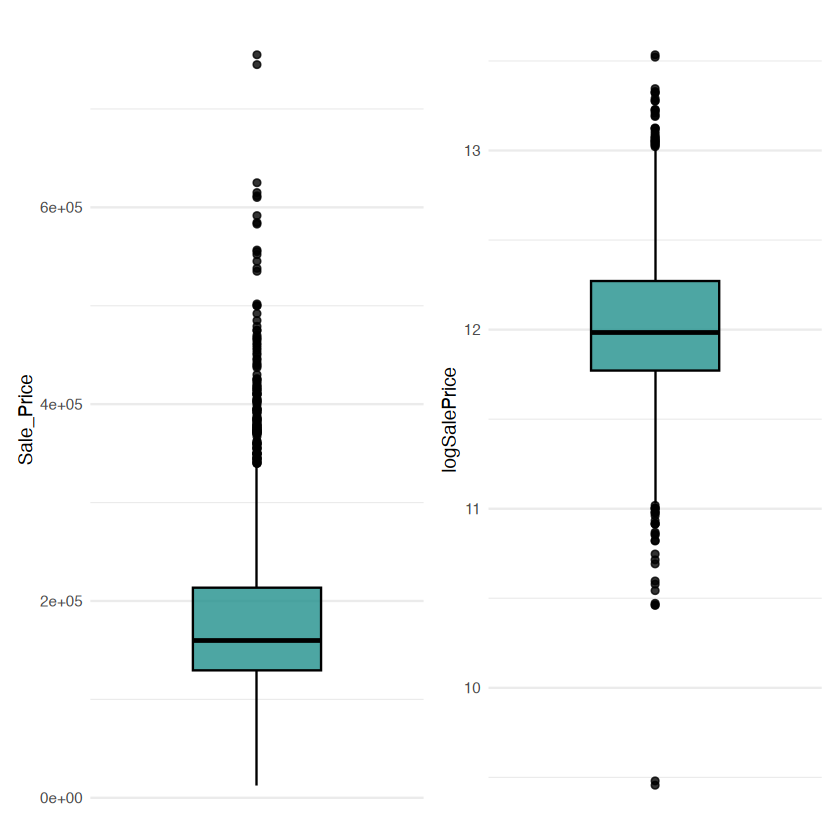

In [104]:
library(patchwork)

# copy ames data
log_ames <- copy(ames)
# log transform target
log_ames[, logSalePrice := log(Sale_Price)]
# plot
autoplot(as_task_regr(log_ames, target = "Sale_Price")) +
  autoplot(as_task_regr(log_ames, target = "logSalePrice"))

In [ ]:
df <- data.table(x = runif(5), y = runif(5, 10, 20))
df

# x         y       
# 1 0.9150469 17.40540
# 2 0.3435739 14.02899
# 3 0.1481765 19.88232
# 4 0.3931353 10.59325
# 5 0.7006864 19.88954

x,y
<dbl>,<dbl>
0.9150469,17.40540
0.3435739,14.02899
0.1481765,19.88232
0.3931353,10.59325
0.7006864,19.88954


In [ ]:
# 1. log transform the target
df[, y := log(y)]
df$y

# [1] 2.856780 2.641126 2.989831 2.360217 2.990194

[1] 2.856780 2.641126 2.989831 2.360217 2.990194

In [ ]:
# 2. make linear regression predictions
#    predictions on the log-transformed scale
yhat <- predict(lm(y ~ x, df), df)
yhat

# 1        2        3        4        5 
# 2.842116 2.739526 2.704449 2.748423 2.803634

1        2        3        4        5 
2.842116 2.739526 2.704449 2.748423 2.803634

In [ ]:
# 3. transform to correct scale with inverse of log function
#    predictions on the original scale
exp(yhat)

# 1        2        3        4        5 
# 17.15202 15.47965 14.94607 15.61799 16.50452

1        2        3        4        5 
17.15202 15.47965 14.94607 15.61799 16.50452

In [ ]:
glrn_log_lm_robust <- as_learner(
  ppl(
    "targettrafo",
    graph = glrn_lm_robust,
    targetmutate.trafo = function(x) log(x),
    targetmutate.inverter = function(x) list(response = exp(x$response))
  )
)
glrn_log_lm_robust$id <- "lm_robust_logtrafo"

bmr_new <- benchmark(
  benchmark_grid(tsk_ames, glrn_log_lm_robust, rsmp_cv3)
)

INFO  [19:59:00.607] [mlr3] Running benchmark with 3 resampling iterations
INFO  [19:59:00.624] [mlr3] Applying learner 'lm_robust_logtrafo' on task 'ames' (iter 1/3)
INFO  [19:59:02.489] [mlr3] Applying learner 'lm_robust_logtrafo' on task 'ames' (iter 2/3)
INFO  [19:59:04.329] [mlr3] Applying learner 'lm_robust_logtrafo' on task 'ames' (iter 3/3)


Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()
This happened PipeOp lm_robust's $predict()"
Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()
This happened PipeOp lm_robust's $predict()"
Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()
This happened PipeOp lm_robust's $predict()"


INFO  [19:59:05.803] [mlr3] Finished benchmark


In [ ]:
bmr$combine(bmr_new)
bmr$aggregate(measure = msr_mae)[, .(learner_id, regr.mae)]

# learner_id         regr.mae
# 1 Baseline           56099.71
# 2 XGB_enc_impact     16470.41
# 3 XGB_enc_onehot     16613.76
# 4 RF_impute_hist     16253.48
# 5 RF_impute_oor      16264.38
# 6 lm_robust          16154.68
# 7 lm_robust_logtrafo 15356.48

learner_id,regr.mae
<chr>,<dbl>
Baseline,56099.71
XGB_enc_impact,16470.41
XGB_enc_onehot,16613.76
RF_impute_hist,16253.48
RF_impute_oor,16264.38
lm_robust,16154.68
lm_robust_logtrafo,15356.48


# 功能性特征提取

In [113]:
energy_data <- mlr3data::energy_usage

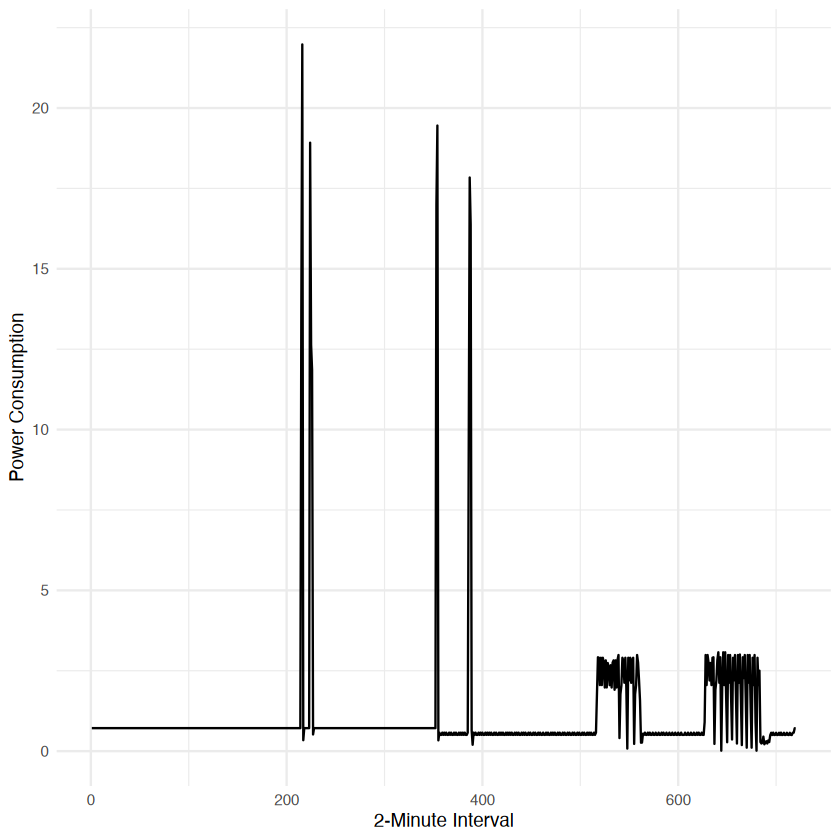

In [114]:
library(ggplot2)

df <- data.frame(
  interval = 1:720,
  power = as.numeric(energy_data[1, ])
)

ggplot(df, aes(x = interval, y = power)) +
  geom_line() +
  theme_minimal() +
  labs(x = "2-Minute Interval", y = "Power Consumption")

In [115]:
PipeOpFuncExtract = R6::R6Class(
  "PipeOpFuncExtract",
  inherit = mlr3pipelines::PipeOpTaskPreprocSimple,
  private = list(
    .transform_dt = function(dt, levels) {
      ffeat_names <- paste0("att", 1:720)
      ffeats <- dt[, ..ffeat_names]
      dt[, energy_means := apply(ffeats, 1, mean)]
      dt[, energy_mins := apply(ffeats, 1, min)]
      dt[, energy_maxs := apply(ffeats, 1, max)]
      dt[, energy_vars := apply(ffeats, 1, var)]
      dt[, (ffeat_names) := NULL]
      dt
    }
  )
)

In [ ]:
tsk_ames_ext <- cbind(ames, energy_data)
tsk_ames_ext <- as_task_regr(
  tsk_ames_ext,
  target = "Sale_Price",
  id = "ames_ext"
)
# 移除冗余变量
tsk_ames_ext$select(setdiff(tsk_ames_ext$feature_names, to_remove))

func_extractor <- PipeOpFuncExtract$new(id = "energy_extract")
tsk_ames_ext <- func_extractor$train(list(tsk_ames_ext))[[1]]
tsk_ames_ext$data(
  rows = 1,
  cols = c("energy_means", "energy_mins", "energy_maxs", "energy_vars")
)

# energy_means energy_mins energy_maxs energy_vars
# 1 1.061558     0.01426834  21.97755    3.708473

energy_means,energy_mins,energy_maxs,energy_vars
<dbl>,<dbl>,<dbl>,<dbl>
1.061558,0.01426834,21.97755,3.708473


In [117]:
learners <- list(
  lrn_baseline,
  lrn("regr.rpart"),
  glrn_xgb_impact,
  glrn_rf_impute_oor,
  glrn_lm_robust,
  glrn_log_lm_robust
)

bmr_final <- benchmark(
  benchmark_grid(
    c(tsk_ames_ext, tsk_ames),
    learners,
    rsmp_cv3
  )
)

INFO  [20:09:26.857] [mlr3] Running benchmark with 36 resampling iterations
INFO  [20:09:26.874] [mlr3] Applying learner 'Baseline' on task 'ames_ext' (iter 1/3)
INFO  [20:09:26.901] [mlr3] Applying learner 'Baseline' on task 'ames_ext' (iter 2/3)
INFO  [20:09:26.925] [mlr3] Applying learner 'Baseline' on task 'ames_ext' (iter 3/3)
INFO  [20:09:26.949] [mlr3] Applying learner 'regr.rpart' on task 'ames_ext' (iter 1/3)
INFO  [20:09:27.059] [mlr3] Applying learner 'regr.rpart' on task 'ames_ext' (iter 2/3)
INFO  [20:09:27.129] [mlr3] Applying learner 'regr.rpart' on task 'ames_ext' (iter 3/3)
INFO  [20:09:27.399] [mlr3] Applying learner 'XGB_enc_impact' on task 'ames_ext' (iter 1/3)
INFO  [20:09:29.362] [mlr3] Applying learner 'XGB_enc_impact' on task 'ames_ext' (iter 2/3)
INFO  [20:09:30.970] [mlr3] Applying learner 'XGB_enc_impact' on task 'ames_ext' (iter 3/3)
INFO  [20:09:32.600] [mlr3] Applying learner 'RF_impute_oor' on task 'ames_ext' (iter 1/3)
INFO  [20:09:33.938] [mlr3] Applyin

Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()"
Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()"
Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()"
Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
This happened PipeOp regr.lm's $predict()
This happened PipeOp lm_robust's $predict()"
Warning message in predict.lm(object = self$model, newdata = newdata, se.fit = se_fit, :
"prediction from rank-deficient

INFO  [20:10:03.514] [mlr3] Finished benchmark


In [ ]:
perf <- bmr_final$aggregate(measure = msr_mae)
perf[order(learner_id, task_id), .(task_id, learner_id, regr.mae)]

# task_id  learner_id         regr.mae
# 1  ames     Baseline           56099.71
# 2  ames_ext Baseline           56099.71
# 3  ames     RF_impute_oor      16299.03
# 4  ames_ext RF_impute_oor      14161.59
# 5  ames     XGB_enc_impact     16470.41
# 6  ames_ext XGB_enc_impact     14164.54
# 7  ames     lm_robust          16175.03
# 8  ames_ext lm_robust          15100.61
# 9  ames     lm_robust_logtrafo 15337.74
# 10 ames_ext lm_robust_logtrafo 13616.52
# 11 ames     regr.rpart         27698.93
# 12 ames_ext regr.rpart         26368.81

task_id,learner_id,regr.mae
<chr>,<chr>,<dbl>
ames,Baseline,56099.71
ames_ext,Baseline,56099.71
ames,RF_impute_oor,16299.03
ames_ext,RF_impute_oor,14161.59
ames,XGB_enc_impact,16470.41
ames_ext,XGB_enc_impact,14164.54
ames,lm_robust,16175.03
ames_ext,lm_robust,15100.61
ames,lm_robust_logtrafo,15337.74


# 练习

In [137]:
library(mlr3data)
kc_housing <- tsk("kc_housing")
kc_housing$select(setdiff(kc_housing$feature_names, "date"))

In [138]:
df <- kc_housing$data()
head(df)

price,bathrooms,bedrooms,condition,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<int>
221900,1.00,3,3,1,7,47.5112,-122.257,1180,NA,1180,1340,5650,5650,0,FALSE,1955,NA,98178
538000,2.25,3,3,2,7,47.7210,-122.319,2170,400,2570,1690,7242,7639,0,FALSE,1951,1991,98125
180000,1.00,2,3,1,6,47.7379,-122.233,770,NA,770,2720,10000,8062,0,FALSE,1933,NA,98028
604000,3.00,4,5,1,7,47.5208,-122.393,1050,910,1960,1360,5000,5000,0,FALSE,1965,NA,98136
510000,2.00,3,3,1,8,47.6168,-122.045,1680,NA,1680,1800,8080,7503,0,FALSE,1987,NA,98074
1225000,4.50,4,3,1,11,47.6561,-122.005,3890,1530,5420,4760,101930,101930,0,FALSE,2001,NA,98053


In [139]:
df %>% glimpse()

Rows: 21,613
Columns: 19
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257500,~
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00, 2.~
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4, 2,~
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4,~
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1~
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7, 7~
$ lat           <dbl> 47.5112, 47.7210, 47.7379, 47.5208, 47.6168, 47.6561, 47~
$ long          <dbl> -122.257, -122.319, -122.233, -122.393, -122.045, -122.0~
$ sqft_above    <int> 1180, 2170, 770, 1050, 1680, 3890, 1715, 1060, 1050, 189~
$ sqft_basement <int> NA, 400, NA, 910, NA, 1530, NA, NA, 730, NA, 1700, 300, ~
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, 189~
$ sqft_living15 <int> 1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 23~
$ sqft_lot     

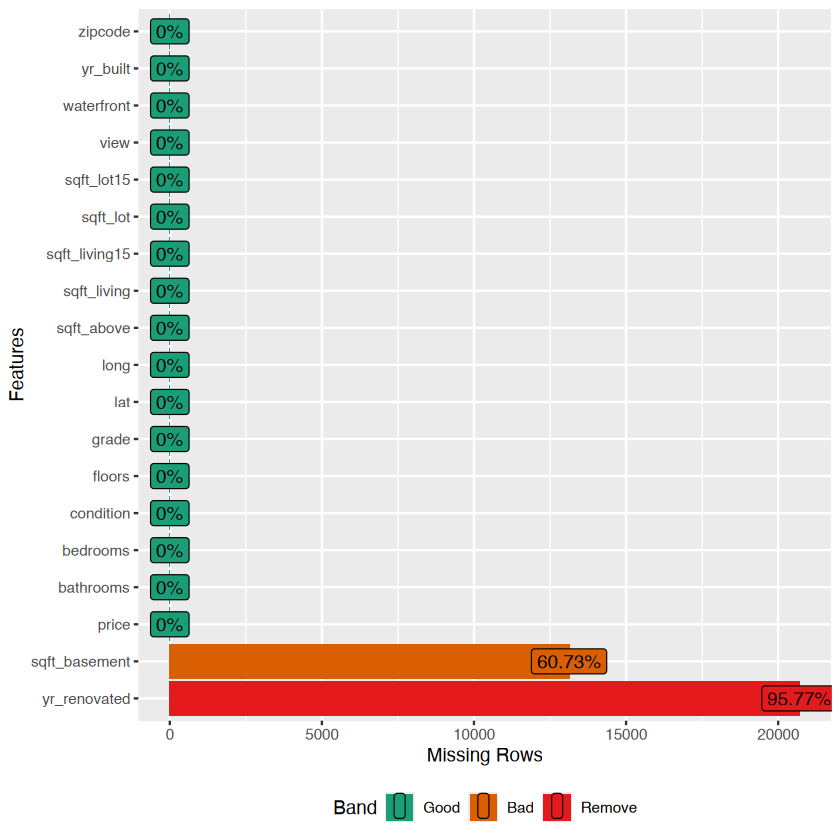

In [140]:
plot_missing(df)

In [ ]:
skim(df) %>% print()

-- Data Summary ------------------------
                           Values
Name                       df    
Number of rows             21613 
Number of columns          19    
Key                        NULL  
_______________________          
Column type frequency:           
  logical                  1     
  numeric                  18    
________________________         
Group variables            None  

-- Variable type: logical ------------------------------------------------------
  skim_variable n_missing complete_rate    mean count               
1 waterfront            0             1 0.00754 FAL: 21450, TRU: 163

-- Variable type: numeric ------------------------------------------------------
   skim_variable n_missing complete_rate       mean         sd      p0       p25
 1 price                 0        1      540088.    367127.    75000   321950   
 2 bathrooms             0        1           2.11       0.770     0        1.75
 3 bedrooms              0        1     

In [128]:
# 找出相关系数为1的组合
cor(df)

,price,bathrooms,bedrooms,condition,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
price,1.00000000,0.52513751,0.308349598,0.036361789,0.256793888,0.66743426,0.3070034800,0.02162624,0.6055672984,NA,0.70203505,0.58537890,0.089660861,0.082447153,0.397293488,0.266369434,0.05401153,NA,-0.053202854
bathrooms,0.52513751,1.00000000,0.515883638,-0.124981933,0.500653173,0.66498253,0.0245729528,0.22304184,0.6853424759,NA,0.75466528,0.56863429,0.087739662,0.087175361,0.187737024,0.063743629,0.50601944,NA,-0.203866274
bedrooms,0.30834960,0.51588364,1.000000000,0.028472104,0.175428935,0.35696673,-0.0089310097,0.12947298,0.4776001614,NA,0.57667069,0.39163752,0.031703243,0.029244224,0.079531852,-0.006582479,0.15417807,NA,-0.152668487
condition,0.03636179,-0.12498193,0.028472104,1.000000000,-0.263767946,-0.14467367,-0.0149410064,-0.10650045,-0.1582136164,NA,-0.05875259,-0.09282427,-0.008958250,-0.003405523,0.045989737,0.016653157,-0.36141656,NA,0.003025524
floors,0.25679389,0.50065317,0.175428935,-0.263767946,1.000000000,0.45818251,0.0496141310,0.12541903,0.5238847103,NA,0.35394929,0.27988527,-0.005200991,-0.011269187,0.029443820,0.023698320,0.48931942,NA,-0.059120642
grade,0.66743426,0.66498253,0.356966725,-0.144673671,0.458182514,1.00000000,0.1140840571,0.19837215,0.7559229376,NA,0.76270448,0.71320209,0.113621124,0.119247897,0.251320585,0.082774914,0.44696320,NA,-0.184862093
lat,0.30700348,0.02457295,-0.008931010,-0.014941006,0.049614131,0.11408406,1.0000000000,-0.13551178,-0.0008164986,NA,0.05252946,0.04885793,-0.085682788,-0.086418807,0.006156732,-0.014273776,-0.14812240,NA,0.267047950
long,0.02162624,0.22304184,0.129472975,-0.106500448,0.125419028,0.19837215,-0.1355117836,1.00000000,0.3438030175,NA,0.24022330,0.33460498,0.229520859,0.254451288,-0.078399712,-0.041910200,0.40935620,NA,-0.564071606
sqft_above,0.60556730,0.68534248,0.477600161,-0.158213616,0.523884710,0.75592294,-0.0008164986,0.34380302,1.0000000000,NA,0.87659660,0.73187029,0.183512281,0.194049862,0.167649344,0.072074592,0.42389835,NA,-0.261189977
sqft_basement,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA


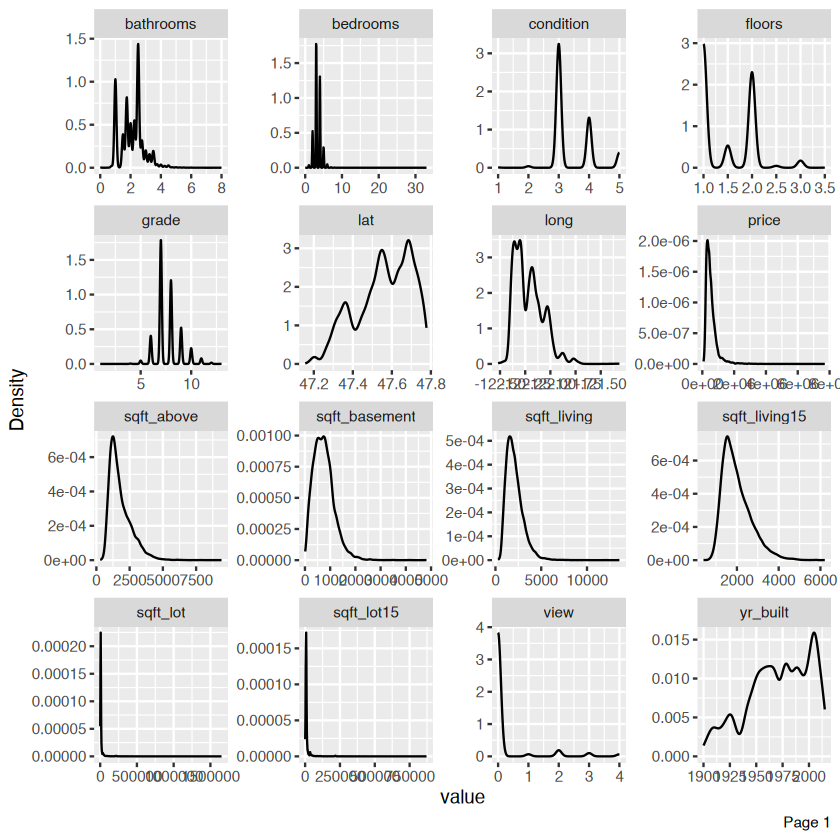

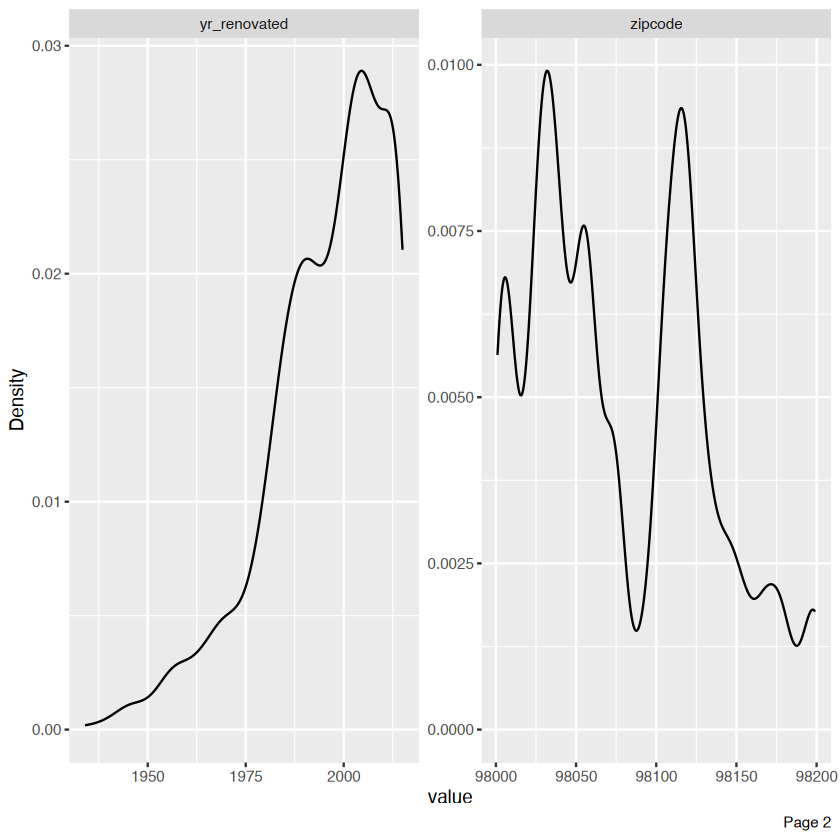

In [129]:
plot_density(df)

In [147]:
glimpse(df)

Rows: 21,613
Columns: 19
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257500,~
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00, 2.~
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4, 2,~
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4,~
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1~
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7, 7~
$ lat           <dbl> 47.5112, 47.7210, 47.7379, 47.5208, 47.6168, 47.6561, 47~
$ long          <dbl> -122.257, -122.319, -122.233, -122.393, -122.045, -122.0~
$ sqft_above    <int> 1180, 2170, 770, 1050, 1680, 3890, 1715, 1060, 1050, 189~
$ sqft_basement <int> NA, 400, NA, 910, NA, 1530, NA, NA, 730, NA, 1700, 300, ~
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, 189~
$ sqft_living15 <int> 1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 23~
$ sqft_lot     

In [155]:
# 部分变量转化为因子
df <- df %>%
  mutate(
    waterfront = as.factor(waterfront),
    view = as.factor(view),
    condition = as.factor(condition),
    grade = as.factor(grade),
    zip_code = as.factor(zipcode)
  ) %>%
  # 删除缺失值过多的yr_renovated
  select(-yr_renovated)

kc_housing <- as_task_regr(df, target = "price", id = "kc_housing")

In [156]:
kc_housing

<TaskRegr:kc_housing> (21613 x 19)
* Target: price
* Properties: -
* Features (18):
  - int (9): bedrooms, sqft_above, sqft_basement, sqft_living,
    sqft_living15, sqft_lot, sqft_lot15, yr_built, zipcode
  - fct (5): condition, grade, view, waterfront, zip_code
  - dbl (4): bathrooms, floors, lat, long

In [133]:
kc_housing <- as_task_regr(df, target = "price", id = "kc_housing")

In [ ]:
gr_test <- po(
  "encode",
  affect_columns = selector_type("factor")
) %>>%
  po(
    "imputehist",
    affect_columns = selector_name("sqft_basement")
  ) %>>%
  lrn("regr.glmnet")

glrn_test <- as_learner(gr_test)
glrn_test$id <- "test"

gr_robust <- ppl(
  "robustify",
  task = kc_housing,
  learner = lrn("regr.glmnet")
) %>>%
  lrn("regr.glmnet")
glrn_robust <- as_learner(gr_robust)
glrn_robust$id <- "robust"

# 基准测试
bmr_test <- benchmark(
  benchmark_grid(
    kc_housing,
    c(glrn_test, glrn_robust),
    rsmp("cv", folds = 3)
  )
)
bmr_test$aggregate(msr_mae)[, .(learner_id, regr.mae)]

# learner_id regr.mae
# 1 test       89124.60
# 2 robust     89160.86

INFO  [20:58:35.049] [mlr3] Running benchmark with 6 resampling iterations
INFO  [20:58:35.058] [mlr3] Applying learner 'test' on task 'kc_housing' (iter 1/3)
INFO  [20:58:35.366] [mlr3] Applying learner 'test' on task 'kc_housing' (iter 2/3)
INFO  [20:58:35.941] [mlr3] Applying learner 'test' on task 'kc_housing' (iter 3/3)
INFO  [20:58:36.185] [mlr3] Applying learner 'robust' on task 'kc_housing' (iter 1/3)
INFO  [20:58:36.716] [mlr3] Applying learner 'robust' on task 'kc_housing' (iter 2/3)
INFO  [20:58:37.435] [mlr3] Applying learner 'robust' on task 'kc_housing' (iter 3/3)


Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp regr.glmnet's $predict()"
Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp regr.glmnet's $predict()"
Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp regr.glmnet's $predict()"
Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp regr.glmnet's $predict()"
Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp regr.glmnet's $predict()"
Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see paramet

INFO  [20:58:38.057] [mlr3] Finished benchmark


learner_id,regr.mae
<chr>,<dbl>
test,89124.60
robust,89160.86


In [165]:
kc_housing <- tsk("kc_housing")
kc_housing$data() %>% glimpse()

Rows: 21,613
Columns: 20
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257500,~
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00, 2.~
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4, 2,~
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4,~
$ date          <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 2015-02~
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1~
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7, 7~
$ lat           <dbl> 47.5112, 47.7210, 47.7379, 47.5208, 47.6168, 47.6561, 47~
$ long          <dbl> -122.257, -122.319, -122.233, -122.393, -122.045, -122.0~
$ sqft_above    <int> 1180, 2170, 770, 1050, 1680, 3890, 1715, 1060, 1050, 189~
$ sqft_basement <int> NA, 400, NA, 910, NA, 1530, NA, NA, 730, NA, 1700, 300, ~
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, 189~
$ sqft_living15

In [167]:
# 西雅图市中心经纬度
lat0 <- 47.605
long0 <- 122.334

# 提取数据
kc_housing <- tsk("kc_housing")
df <- kc_housing$data()

# 处理数据
df <- df %>%
  mutate(
    waterfront = as.factor(waterfront),
    view = as.factor(view),
    condition = as.factor(condition),
    grade = as.factor(grade),
    zip_code = as.factor(zipcode)
  ) %>%
  # 删除缺失值过多的yr_renovated
  select(-yr_renovated) %>%
  # 分割日期为年月日三个变量
  mutate(
    date = as.Date(date),
    year = as.integer(format(date, "%Y")),
    month = as.integer(format(date, "%m")),
    day = as.integer(format(date, "%d"))
  ) %>%
  # 删除原始日期变量
  select(-date) %>%
  # 计算距离
  mutate(
    distance = sqrt((lat - lat0)^2 + (long - long0)^2)
  ) %>%
  # 删除经纬度变量
  select(-lat, -long)

# 重组任务
kc_housing <- as_task_regr(df, target = "price", id = "kc_housing")

In [ ]:
# 使用稳健化管道
gr_robust <- ppl(
  "robustify",
  task = kc_housing,
  learner = lrn("regr.glmnet")
) %>>%
  lrn("regr.glmnet")
glrn_robust <- as_learner(gr_robust)
glrn_robust$id <- "robust"

# 测试
rr <- resample(
  kc_housing,
  glrn_robust,
  rsmp("cv", folds = 3)
)
rr$aggregate(msr_mae)

# regr.mae 
# 88785.95

INFO  [21:07:00.698] [mlr3] Applying learner 'robust' on task 'kc_housing' (iter 1/3)
INFO  [21:07:01.409] [mlr3] Applying learner 'robust' on task 'kc_housing' (iter 2/3)
INFO  [21:07:02.412] [mlr3] Applying learner 'robust' on task 'kc_housing' (iter 3/3)


Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp regr.glmnet's $predict()"
Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp regr.glmnet's $predict()"
Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp regr.glmnet's $predict()"


regr.mae 
88785.95

In [169]:
library(data.table)